# 1. import libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd
import os
import datetime
from selenium import webdriver  
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
import random

# 2. import data

In [2]:
data = pd.read_csv('D:/Tho/Python zero to hero/Project/delivery_orders_march.csv')

# 3. check data

In [3]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,1583138397,1.583385e+09,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,1583309968,1.583463e+09,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,1583306434,1.583460e+09,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,1583419016,1.583556e+09,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,1583318305,1.583480e+09,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...


In [4]:
data.tail()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
3176308,31504087640510,1585821728,1.585978e+09,NaN,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,1585895011,1.586179e+09,1.586232e+09,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,1585826951,1.585965e+09,NaN,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,1585891194,1.586230e+09,NaN,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...
3176312,31505199116340,1585823923,1.586153e+09,1.586231e+09,b4l13 TOLDA 792-A-5-A east...near CARRASCO Ang...,(Jeepney Kaligayan VANVAN Salud ASA Lauan A-55...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176313 entries, 0 to 3176312
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   orderid              int64  
 1   pick                 int64  
 2   1st_deliver_attempt  float64
 3   2nd_deliver_attempt  float64
 4   buyeraddress         object 
 5   selleraddress        object 
dtypes: float64(2), int64(2), object(2)
memory usage: 145.4+ MB


In [6]:
data.describe()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt
count,3.176313e+06,3.176313e+06,3.176313e+06,1.357002e+06
mean,4.639170e+12,1.584157e+09,1.584533e+09,1.584725e+09
std,1.104981e+13,6.704572e+05,7.416932e+05,6.072972e+05
min,2.195010e+09,1.583079e+09,1.583132e+09,1.583251e+09
25%,2.266298e+09,1.583579e+09,1.583982e+09,1.584518e+09
50%,2.299981e+09,1.584092e+09,1.584424e+09,1.584527e+09
75%,2.337305e+09,1.584512e+09,1.584939e+09,1.585008e+09
max,3.150713e+13,1.586181e+09,1.586268e+09,1.586287e+09


# 4. clean the data

## 4.1. transfer unix time to date time

In [7]:
data[['pick','1st_deliver_attempt','2nd_deliver_attempt']] += 8*60*60
data['pick'] = pd.to_datetime(data['pick'], unit = 's').dt.date
data['1st_deliver_attempt'] = pd.to_datetime(data['1st_deliver_attempt'], unit = 's').dt.date
data['2nd_deliver_attempt'] = data['2nd_deliver_attempt'].replace(np.nan,0)
data['2nd_deliver_attempt'] = pd.to_datetime(data['2nd_deliver_attempt'], unit = 's').dt.date
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,1970-01-01,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,2020-03-04,2020-03-06,2020-03-10,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,2020-03-04,2020-03-06,1970-01-01,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,2020-03-05,2020-03-07,1970-01-01,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,2020-03-04,2020-03-06,1970-01-01,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...


## 4.2. calculate delivery date

In [8]:
data['delivery_time_1'] = np.busday_count(data['pick'], data['1st_deliver_attempt'], weekmask='1111110', holidays = ['2020-03-08', '2020-03-25', '2020-03-30', '2020-03-31'])
data['delivery_time_2'] = np.busday_count(data['1st_deliver_attempt'], data['2nd_deliver_attempt'], weekmask='1111110', holidays = ['2020-03-08', '2020-03-25', '2020-03-30', '2020-03-31'])
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2
0,2215676524,2020-03-02,2020-03-05,1970-01-01,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...,3,-15708
1,2219624609,2020-03-04,2020-03-06,2020-03-10,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ...",2,3
2,2220979489,2020-03-04,2020-03-06,1970-01-01,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M...",2,-15709
3,2221066352,2020-03-05,2020-03-07,1970-01-01,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number...",2,-15710
4,2222478803,2020-03-04,2020-03-06,1970-01-01,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...,2,-15709
...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...,2,-15731
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10...",2,1
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ...",2,-15731
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...,3,-15733


## 4.3. split the address by island name

In [9]:
def split_(x):
    return x.split()[-1]
data['buyeraddress'] = data['buyeraddress'].str.lower().apply(split_)
data['selleraddress'] = data['selleraddress'].str.lower().apply(split_)
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,-15708
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,2,3
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,2,-15709
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,2,-15710
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,2,-15709
...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,manila,manila,2,1
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,luzon,manila,3,-15733


## 4.4 match with matrix SLA table

In [10]:
SLA = []
for x in range(len(data)):
    if data['buyeraddress'][x] == 'manila' and data['selleraddress'][x] == 'manila':
        SLA.append(3)
    elif (data['buyeraddress'][x] == 'luzon' and data['selleraddress'][x] == 'manila') or (data['buyeraddress'][x] == 'manila' and data['selleraddress'][x] == 'luzon') or (data['buyeraddress'][x] == 'luzon' and data['selleraddress'][x] == 'luzon'):
        SLA.append(5)
    else:
        SLA.append(7)
data['days'] = SLA
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2,days
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,-15708,3
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,2,3,3
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,2,-15709,3
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,2,-15710,3
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,2,-15709,5
...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,manila,manila,2,1,3
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,luzon,manila,3,-15733,5


## 4.5 calculate late shipping order

In [11]:
check = []
for y in range(len(data)):
    if data['delivery_time_1'][y]>data['days'][y] or data['delivery_time_2'][y]>3:
        is_late = 1
        check.append(is_late)
    else:
        is_late = 0
        check.append(is_late)
data['check'] = check
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2,days,check
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,-15708,3,0
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,2,3,3,0
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,2,-15709,3,0
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,2,-15710,3,0
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,2,-15709,5,0
...,...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3,0
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,manila,manila,2,1,3,0
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3,0
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,luzon,manila,3,-15733,5,0


## 4.6 pairing buyeraddress with selleraddress

In [12]:
pairing = list(pd.DataFrame(data.groupby(['buyeraddress','selleraddress']))[0].values)
pairing = [[thing[0],thing[1]] for thing in pairing if thing[0] != thing[1]]
statements = ['Khoảng cách từ %s tới %s' %(thing[0],thing[1]) for thing in pairing]
statements

['Khoảng cách từ luzon tới manila',
 'Khoảng cách từ mindanao tới manila',
 'Khoảng cách từ visayas tới manila']

## 4.7 calculate the distance from buyeraddress to selleraddress

In [13]:
a = 'https://www.google.com'

driver = webdriver.Chrome(executable_path='D:/Tho/Python zero to hero/General/Lecture/driver/chromedriver.exe') 
driver.get(a)
search_box = driver.find_element_by_css_selector('input[class= "gLFyf gsfi"]')


res = []

for statement in statements:
    search_box = driver.find_element_by_css_selector('input[class= "gLFyf gsfi"]')
    
    search_box.send_keys(statement)
        
    search_box.send_keys(Keys.ENTER)
    
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CLASS_NAME, "logo")))
    
    
    if (driver.find_element_by_xpath('//span[contains(text(),"km")]').text == '') or \
    (len(driver.find_element_by_xpath('//span[contains(text(),"km")]').text) >= 12):
#         print((driver.find_element_by_xpath('//div[contains(text(),"km")]').text))
        res.append(driver.find_element_by_xpath('//div[contains(text(),"km")]').text)
        
    else:
#         print((driver.find_element_by_xpath('//span[contains(text(),"km")]').text))
        res.append(driver.find_element_by_xpath('//span[contains(text(),"km")]').text)
    
    search_box = driver.find_element_by_css_selector('input[class= "gLFyf gsfi"]')
    
    search_box.clear()

res

['323,1 km', '1.024,7 km', '484 km']

In [14]:
results = []

pairing = list(pd.DataFrame(data.groupby(['buyeraddress','selleraddress']))[0].values)
pairing = [[thing[0],thing[1]] for thing in pairing if thing[0] != thing[1]]
pairing

for i in range(len(res)):
    pairing[i].append(res[i])
    results.append(pairing[i])

res_ = pd.DataFrame(results, columns = ['buyer', 'seller', 'distance'])
res_

,buyer,seller,distance
0,luzon,manila,"323,1 km"
1,mindanao,manila,"1.024,7 km"
2,visayas,manila,484 km


## 4.8. create new dataframe

In [15]:
distance = []
for e in range(len(data)):
    if data['buyeraddress'][e]==res_['buyer'][0] and data['selleraddress'][e]==res_['seller'][0]:
        dis = int(res_['distance'][0].split()[0].replace(',',''))
        distance.append(dis)
    elif data['buyeraddress'][e]==res_['buyer'][1] and data['selleraddress'][e]==res_['seller'][1]:
        dis = int(res_['distance'][1].split()[0].replace(',','').replace('.',''))
        distance.append(dis)
    elif data['buyeraddress'][e]==res_['buyer'][2] and data['selleraddress'][e]==res_['seller'][2]:
        dis = int(res_['distance'][2].split()[0].replace(',',''))
        distance.append(dis)
    elif data['buyeraddress'][e]==data['selleraddress'][e]:
        dis = 0
        distance.append(dis)
distance
data['distance'] = distance
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2,days,check,distance
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,-15708,3,0,0
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,2,3,3,0,0
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,2,-15709,3,0,0
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,2,-15710,3,0,0
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,2,-15709,5,0,3231
...,...,...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3,0,0
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,manila,manila,2,1,3,0,0
3176310,31504462290482,2020-04-02,2020-04-04,1970-01-01,manila,manila,2,-15731,3,0,0
3176311,31504851495943,2020-04-03,2020-04-07,1970-01-01,luzon,manila,3,-15733,5,0,3231


In [16]:
export_data = data.to_csv('D:/Tho/Python zero to hero/Project/ex_data.csv')
export_data

# 5. check data again

In [17]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,delivery_time_1,delivery_time_2,days,check,distance
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,-15708,3,0,0
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,2,3,3,0,0
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,2,-15709,3,0,0
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,2,-15710,3,0,0
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,2,-15709,5,0,3231


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176313 entries, 0 to 3176312
Data columns (total 11 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   orderid              int64 
 1   pick                 object
 2   1st_deliver_attempt  object
 3   2nd_deliver_attempt  object
 4   buyeraddress         object
 5   selleraddress        object
 6   delivery_time_1      int64 
 7   delivery_time_2      int64 
 8   days                 int64 
 9   check                int64 
 10  distance             int64 
dtypes: int64(6), object(5)
memory usage: 266.6+ MB


In [19]:
data.describe()

,orderid,delivery_time_1,delivery_time_2,days,check,distance
count,3.176313e+06,3.176313e+06,3.176313e+06,3.176313e+06,3.176313e+06,3.176313e+06
mean,4.639170e+12,3.573494e+00,-9.002533e+03,4.527773e+00,2.400336e-01,1.960079e+03
std,1.104981e+13,2.376331e+00,7.777273e+03,1.662344e+00,4.271037e-01,3.128135e+03
min,2.195010e+09,0.000000e+00,-1.573300e+04,3.000000e+00,0.000000e+00,0.000000e+00
25%,2.266298e+09,2.000000e+00,-1.572000e+04,3.000000e+00,0.000000e+00,0.000000e+00
50%,2.299981e+09,3.000000e+00,-1.571100e+04,5.000000e+00,0.000000e+00,4.840000e+02
75%,2.337305e+09,5.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,3.231000e+03
max,3.150713e+13,2.600000e+01,2.600000e+01,7.000000e+00,1.000000e+00,1.024700e+04


In [20]:
data[['buyeraddress', 'check']].groupby(['buyeraddress']).agg({'check':'sum'}).sort_values(by='check', ascending=False)

,check
buyeraddress,
manila,376426
visayas,137407
mindanao,124363
luzon,124226


In [21]:
data[['selleraddress', 'check']].groupby(['selleraddress']).agg({'check':'sum'}).sort_values(by='check', ascending=False)

,check
selleraddress,
manila,762422
luzon,0


In [22]:
data[['buyeraddress','selleraddress', 'distance','check']].groupby(['buyeraddress','selleraddress'], as_index=False).mean().sort_values(by='check', ascending=False)

,buyeraddress,selleraddress,distance,check
3,mindanao,manila,10247.0,0.375569
4,visayas,manila,484.0,0.286506
2,manila,manila,0.0,0.241191
1,luzon,manila,3231.0,0.154340
0,luzon,luzon,0.0,0.000000


# 6. visualize data

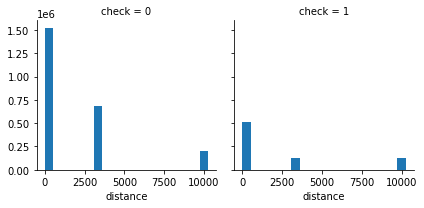

In [23]:
g = sns.FacetGrid(data, col='check')
g.map(plt.hist, 'distance', bins=20)

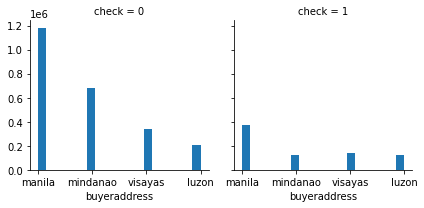

In [24]:
g = sns.FacetGrid(data, col='check')
g.map(plt.hist, 'buyeraddress', bins=20)

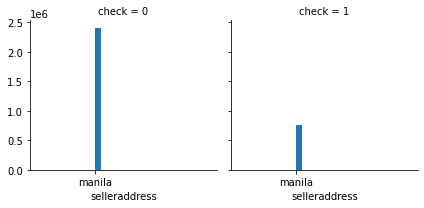

In [25]:
g = sns.FacetGrid(data, col='check')
g.map(plt.hist, 'selleraddress', bins=20)

# 7. machine learning

## 7.1. one hot encoding


In [26]:
new_label = ['selleraddress_' + str(e) for e in list(set(data.selleraddress))]
new_label.sort()
onehot = OneHotEncoder(categories='auto')
org_form = onehot.fit_transform(data.selleraddress.values.reshape(-1,1)).toarray()
onehot_df_selleraddress = pd.DataFrame(org_form)
onehot_df_selleraddress.columns = new_label

In [27]:
new_label = ['buyeraddress_' + str(e) for e in list(set(data.buyeraddress))]
new_label.sort()
onehot = OneHotEncoder(categories='auto')
org_form = onehot.fit_transform(data.buyeraddress.values.reshape(-1,1)).toarray()
onehot_df_buyeraddress = pd.DataFrame(org_form)
onehot_df_buyeraddress.columns = new_label

In [28]:
dataset = data.drop(columns = ['buyeraddress','selleraddress', '1st_deliver_attempt', '2nd_deliver_attempt', 'delivery_time_1', 'delivery_time_2', 'days', 'pick'] )

In [29]:
all_dt = pd.concat([dataset,onehot_df_selleraddress,onehot_df_buyeraddress],axis = 1)
all_dt

,orderid,check,distance,selleraddress_luzon,selleraddress_manila,buyeraddress_luzon,buyeraddress_manila,buyeraddress_mindanao,buyeraddress_visayas
0,2215676524,0,0,0.0,1.0,0.0,1.0,0.0,0.0
1,2219624609,0,0,0.0,1.0,0.0,1.0,0.0,0.0
2,2220979489,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3,2221066352,0,0,0.0,1.0,0.0,1.0,0.0,0.0
4,2222478803,0,3231,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3176309,31504147352227,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3176310,31504462290482,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3176311,31504851495943,0,3231,0.0,1.0,1.0,0.0,0.0,0.0


## 7.2. run Logistic Regression model

In [30]:
# split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(all_dt.drop(columns ='check'), data.check, test_size=0.1, random_state=42)

In [32]:
# Build model
logisticRegr = LogisticRegression()

#Train the model
logisticRegr.fit(x_train, y_train)

# Predict with new dataset
predictions_logisticRegr = logisticRegr.predict(x_test)

# Confusion matrix and 
confusion_matrix_logisticRegr = metrics.confusion_matrix(y_test, predictions_logisticRegr)
print(confusion_matrix_logisticRegr)

# Accuracy
score_logisticRegr = logisticRegr.score(x_test, y_test)
print(score_logisticRegr)

c:\users\apc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[241016      0]
 [ 76616      0]]
0.7587900463429378


## 7.3. run Logistic Regression CV model

In [33]:
# split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(all_dt.drop(columns ='check'), data.check, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

In [34]:
# build model 
logisticRegr = LogisticRegressionCV( random_state=0,cv=5)

#Train the model
logisticRegr.fit(X_train_trans,y_train)

# Predict with new dataset
predictions_logisticRegrCV = logisticRegr.predict(X_test_trans)

In [36]:
# Confusion matrix and 
confusion_matrix_logisticRegrCV = metrics.confusion_matrix(y_test, predictions_logisticRegrCV)
print(confusion_matrix_logisticRegrCV)

# Accuracy
score_logisticRegrCV = logisticRegr.score(X_test_trans, y_test)
print(score_logisticRegrCV)

[[603138      0]
 [190941      0]]
0.7595440755894565


## 7.4. run MLP model

In [37]:
# split data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(all_dt.drop(columns ='check'), data.check, test_size=0.1, random_state=42)

In [38]:
# build MLP model
clf = MLPClassifier(solver='lbfgs', alpha= 0.001,hidden_layer_sizes=(8, 5), random_state=1)

In [39]:
# train MLP model
clf.fit(x_train, y_train)

c:\users\apc\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(8, 5), random_state=1,
              solver='lbfgs')

In [40]:
# apply model to prediction
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# calculate accuracy
clf.score(x_test, y_test)

0.7587900463429378